# Proyecto integral
## Armando Rafael Acuña Martínez 
E-mail: armando.acuna01@usa.edu.co <br>
Diseño de Software Inteligente <br>
__Maestria en Inteligencia Artificial__<br>


Inclusión de otras librerías que serán utilizadas

In [1]:
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
from pathlib import Path

import urllib.request
import zipfile
import urllib.request
import seaborn as sns

import sys

import numpy as np

from packaging import version

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

from keras.layers import Dense, Dropout

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

Este proyecto requiere Python 3.7 o superior:

In [2]:
assert sys.version_info >= (3, 7)

Tanboén requiere Scikit-Learn ≥ 1.0.1:

In [3]:
import sklearn
print(version.parse(sklearn.__version__))

1.2.2


Se define la función save_fig() que se utiliza a través de este cuaderno para guardar las figuras en alta resolución.

In [4]:
# código aportado por el Ing. Marco Terán- código para guardar las figuras como PNG de alta resolución para el libro

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Obtener los datos

Los datos se encuentran alojados en github, en un archivo .zip, en la ruta https://raw.githubusercontent.com/armaacum/data/main/archive.zip <br>
El siguiente código carga el archivo.zip y estrae el archivo StudentsPerformance.csv

In [5]:
def load_students_data():
    zip_file_path = Path("main/archive.zip")
    if not zip_file_path.is_file():
        Path("main").mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/armaacum/data/main/archive.zip"
        urllib.request.urlretrieve(url, zip_file_path)
    with zipfile.ZipFile(zip_file_path) as zip_file:
        zip_file.extract("StudentsPerformance.csv", path="main")
    return pd.read_csv(Path("main/StudentsPerformance.csv"))

archivo = load_students_data()  #El DataSet queda guardado en archivo

In [6]:
# se genera una copia del Dataset para no afectar accidentalmente la información original
students = archivo.copy()  # students es copia de archivo

Se determina el tamaño del DataFrame

In [7]:
students.shape

(1000, 8)

El DataFrame tiene 1000 instancias por 8 características

# Revisión a la estructura de datos

In [8]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Cada instancia o fila representa un estudiante. <br>
Hay 8 características o atributos: Gender, race/ethnicity, parental level of education, Lunch, test preparation course, math score, reading score y writing score.

El método info() da una descripción rápida de los datos, en particular el número total de filas, el tipo de cada atributo y el número de valores no nulos.

In [9]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Hay 1.000 instancias en el conjunto de datos, lo que significa que es bastante pequeño para los estándares de aprendizaje automático, la recomendación es trabajar con archivos de datos con mayor número de instancias, sin embargo, se puede utilizar. 

No se identifican valores faltantes y eso es importante porque no se requerirá ni eliminar caracteríticas ni eliminar filas ni completar datos, por datos faltantes. 

Las columnas Gender, race/ethnicity, parental level of education, Lunch y test preparation course tienen valores categóricos (textos) y las columnas math score, reading score y writing score tienen valores numéricos.

Para confirmar que no hay valores nulos se ejecuta el siguiente conteo

In [10]:
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Se identifican los datos categóricos y los datos numéricos, para facilitar su referencia en el DataFrame, mediante dos listas

In [11]:
num = ['math score','reading score','writing score']
cat = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

# Análisis, Exploración y Visualización de Datos

## Ahora se analizará cada una de las características  e identificarán los diferentes valores que se encuentran en las caracteríticas categóricas.

Análisis y Visualización de género

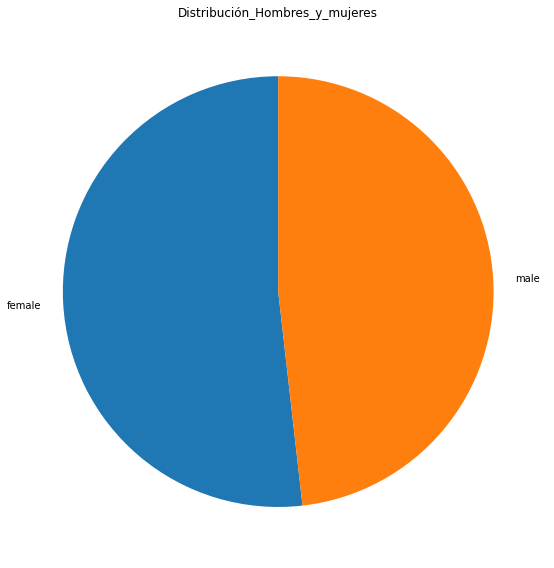

In [12]:
plt.figure(figsize=(12, 8))
plt.title('Distribución_Hombres_y_mujeres')
y = students["gender"].value_counts()
mylabels = ["female", "male"]
plt.pie(y, labels = mylabels, startangle = 90)
save_fig("Distribución_Hombres_y_mujeres")
plt.show() 

In [13]:
students["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [14]:
print("Apariciones de 'male' en gender  {:.2f} %".format(students.apply(lambda x: x['gender'] == 'male', axis=1).sum() / len(students) *100))
print("Apariciones de 'female' en gender {:.2f} %".format(students.apply(lambda x: x['gender'] == 'female', axis=1).sum() / len(students) *100))

Apariciones de 'male' en gender  48.20 %
Apariciones de 'female' en gender 51.80 %


In [15]:
# las siguientes líneas definen los tamaños de fuente por defecto
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
save_fig("Barras_Hombres_y_mujeres")
px.bar(students[cat[0]].value_counts(), orientation='h', height=350, width=800, title= "CANTIDAD DE HOMBRES Y MUJERES")

<Figure size 432x288 with 0 Axes>

Se observa que la característica gender contiene el valor female (con 518 apariciones, 51.8 %) y el valor male (con 482 apariciones, 48.2 %)
Esto indica que en el archivo hay un predominio de estudiantes mujeres que de estudiantes hombres, superándolos en un 3.6 %.

Análisis y Visualización de raza o Grupo Étnico

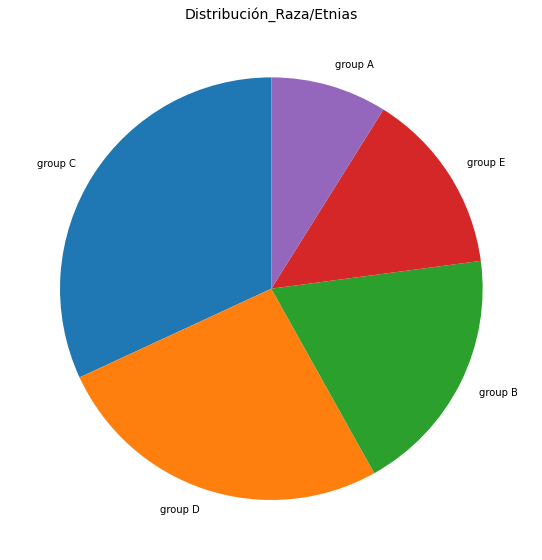

In [16]:
plt.figure(figsize=(12, 8))
plt.title('Distribución_Raza/Etnias')
y = students["race/ethnicity"].value_counts()
mylabels = ['group C','group D', 'group B', 'group E','group A']
plt.pie(y, labels = mylabels, startangle = 90)
save_fig("Distribución_Raza-Etnias")
plt.show() 

In [17]:
students["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [18]:
save_fig("Barras_raza_o_grupo_étnico")
px.bar(students[cat[1]].value_counts(), orientation='', height=450, width=850, title= "RAZA O GRUPO ÉTNICO")

<Figure size 432x288 with 0 Axes>

Se observa que la característica race/ethnicity representa 5 agrupaciones, donde el Grupo A contiene 89 estudiantes, el Grupo B 190, el Grupo C 319, el Grupo D 262 y el Grupo E 140.  Existe un predominio de estudiantes en el Grupo C.

Análisis y Visualización de Nivel de Estudios de los Padres:

In [19]:
students["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [20]:
save_fig("Barras_Nivel_de_Estudios_de_los_padres")
px.bar(students[cat[2]].value_counts(), orientation='v', height=450, width=850, title= "NIVEL DE ESTUDIOS DE LOS PADRES")

<Figure size 432x288 with 0 Axes>

Se observa que la característica parental level of education representa 6 valores, donde el nivel de eduación de los padres "some college" se presenta para 226 estudiantes, "associate's degree" 222, "high school" 196, "some high school" 179, "bachelor's degree" 118 y "master's degree" 50.  Existe un predominio de estudiantes cuyos padres están en la categoría some college.

Análisis y Visualización de la característica asociada al Almuerzo

In [21]:
students["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [22]:
save_fig("Barras_Almuerzo")
px.bar(students[cat[3]].value_counts(), orientation='h', height=300, width=850, title= "ALMUERZO")

<Figure size 432x288 with 0 Axes>

Se observa que la característica lunch representa 2 valores, donde standard contiene 645 estudiantes y free/reduced 355.  Existe un predominio de estudiantes cuyos almuerzo es standard.

Análisis y Visualización de test preparation course

In [23]:
students["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [24]:
save_fig("Barras_test_preparation_course")
px.bar(students[cat[4]].value_counts(), orientation='h', height=300, width=850, title= "PREPARACIÓN DE EXÁMENES")

<Figure size 432x288 with 0 Axes>

Se observa que la característica "test preparation course" representa 2 valores, donde none contiene 642 estudiantes y completed 358.  Existe un predominio de estudiantes que no realizaron el curso de preparación para exámenes.

##En este momento es importante transformar las variables categóricas en variables numéricas, para que sena manejados por los modelos.

Dado que la característica "gender" sólo tiene dos valores, se reemplazará por 0 para Hombre(male) y 1 para Mujer(female)

In [25]:
students = students.replace({'gender' : {"male" : 0, 'female' : 1}})

In [26]:
students["gender"].value_counts()

1    518
0    482
Name: gender, dtype: int64

Dado que la característica "lunch" sólo tiene dos valores, se reemplazará por 0 para free/reduced y 1 para standard

In [27]:
students = students.replace({'lunch' : {"free/reduced" : 0, 'standard' : 1}})

In [28]:
students["lunch"].value_counts()

1    645
0    355
Name: lunch, dtype: int64

Dado que la característica "test preparation course" sólo tiene dos valores, se reemplazará por 0 para none y 1 para completed

In [29]:
students = students.replace({'test preparation course' : {"none" : 0, 'completed' : 1}})

In [30]:
students["test preparation course"].value_counts()

0    642
1    358
Name: test preparation course, dtype: int64

La característica "race/ethnicity" se tratará con OneHotEncoder() dado que no tiene varios valores y no representan un orden

In [31]:

students_cat = students[["race/ethnicity"]]
cat1_encoder = OneHotEncoder()
students_cat1_hot = cat1_encoder.fit_transform(students_cat)

In [32]:
students_cat1_hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [33]:
cat1_encoder.categories_

[array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object)]

Para la característica "parental level of education" se puede establecer un orden numérico

In [34]:
students["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [35]:
students = students.replace({'parental level of education' : {"bachelor's degree" : 4, 'some college' : 3, "master's degree" : 6, "associate's degree":5,"high school": 1,"some high school":2  }})

In [36]:
students["parental level of education"].unique()

array([4, 3, 6, 5, 1, 2])

Luego de esta conversión, los valores quedaron representados así:
"high school": 1,
"some high school":2,
"some college" : 3, 
"bachelor's degree" : 4, 
"associate's degree":5,
"master's degree" : 6

In [37]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,4,1,0,72,72,74
1,1,group C,3,1,1,69,90,88
2,1,group B,6,1,0,90,95,93
3,0,group A,5,0,0,47,57,44
4,0,group C,3,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,group E,6,1,1,88,99,95
996,0,group C,1,0,0,62,55,55
997,1,group C,1,0,1,59,71,65
998,1,group D,3,1,1,68,78,77


In [38]:
students_2 = students.copy()

Se creará DataFrame students_num_f para guardar todos los datos en forma numéríca

In [39]:
students_num_f= students.copy()  #paso todos los datos a students_num_f

In [40]:
students_num_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   int64 
 3   lunch                        1000 non-null   int64 
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


Los datos convertidos a numéricos son agregados al FataFrame students_num_f

In [41]:
students_num_f = pd.concat([students_num_f,pd.DataFrame(students_cat1_hot.toarray())], axis=1)  # se convierte a DataFrame

In [42]:
students_num_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   0                            1000 non-null   float64
 9   1                            1000 non-null   float64
 10  2                            1000 non-null   float64
 11  3                            1000 non-null   float64
 12  4                            1000 non-null   float64
dtypes: float64(5), int6

Ahora eliminamos las características categóricas

In [43]:
students_num_f = students_num_f.drop(["race/ethnicity"], axis=1)

In [44]:
students_num_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   parental level of education  1000 non-null   int64  
 2   lunch                        1000 non-null   int64  
 3   test preparation course      1000 non-null   int64  
 4   math score                   1000 non-null   int64  
 5   reading score                1000 non-null   int64  
 6   writing score                1000 non-null   int64  
 7   0                            1000 non-null   float64
 8   1                            1000 non-null   float64
 9   2                            1000 non-null   float64
 10  3                            1000 non-null   float64
 11  4                            1000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 93.9 KB


Ahora se renombran las características convertidas a numéricas con su valor categórico.

In [45]:
students_num_f = students_num_f.rename(columns={0:'group A', 1:'group B', 2:'group C',  3:'group D',  4:'group E'})
students_num_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   parental level of education  1000 non-null   int64  
 2   lunch                        1000 non-null   int64  
 3   test preparation course      1000 non-null   int64  
 4   math score                   1000 non-null   int64  
 5   reading score                1000 non-null   int64  
 6   writing score                1000 non-null   int64  
 7   group A                      1000 non-null   float64
 8   group B                      1000 non-null   float64
 9   group C                      1000 non-null   float64
 10  group D                      1000 non-null   float64
 11  group E                      1000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 93.9 KB


Se visualizan los primeros 5 instancias del nuevo DataFrame

In [46]:
students_num_f.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E
0,1,4,1,0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,1,3,1,1,69,90,88,0.0,0.0,1.0,0.0,0.0
2,1,6,1,0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,0,5,0,0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,0,3,1,0,76,78,75,0.0,0.0,1.0,0.0,0.0


In [47]:
students_num_copia = students_num_f.copy()

In [48]:
students_num_f = students_num_f.round(0).astype(int)

In [49]:
students_num_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   math score                   1000 non-null   int64
 5   reading score                1000 non-null   int64
 6   writing score                1000 non-null   int64
 7   group A                      1000 non-null   int64
 8   group B                      1000 non-null   int64
 9   group C                      1000 non-null   int64
 10  group D                      1000 non-null   int64
 11  group E                      1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


Para entender el tipo de datos con los que se está trabajando se grafica un histograma para cada atributo numérico. <br>
El histograma muestra el número de instancias (en el eje vertical) que tienen un rango de valores dado (en el eje horizontal). <br> Con el método hist() se generará un histograma para cada atributo numérico. <br>

Veamos ahora la distribución y los valores atípicos usando las gráficas de distribución y los diagramas de cajas

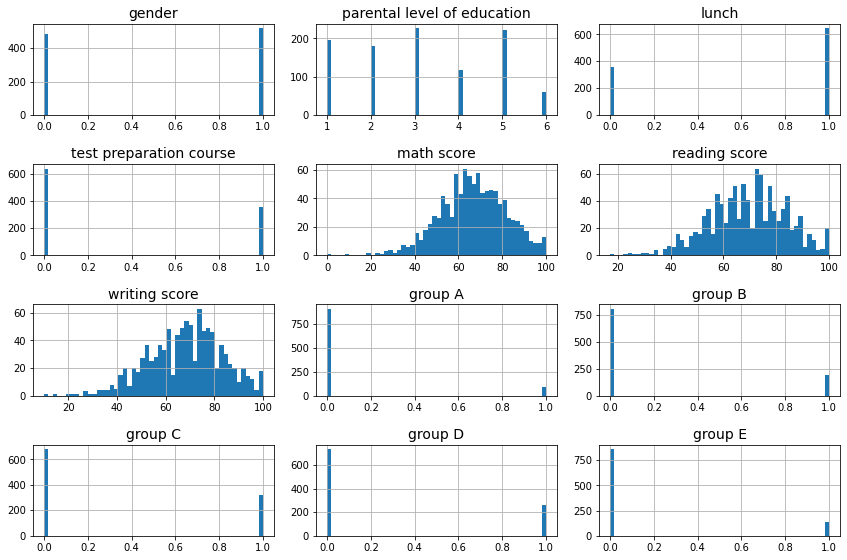

In [50]:
students_num_f.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

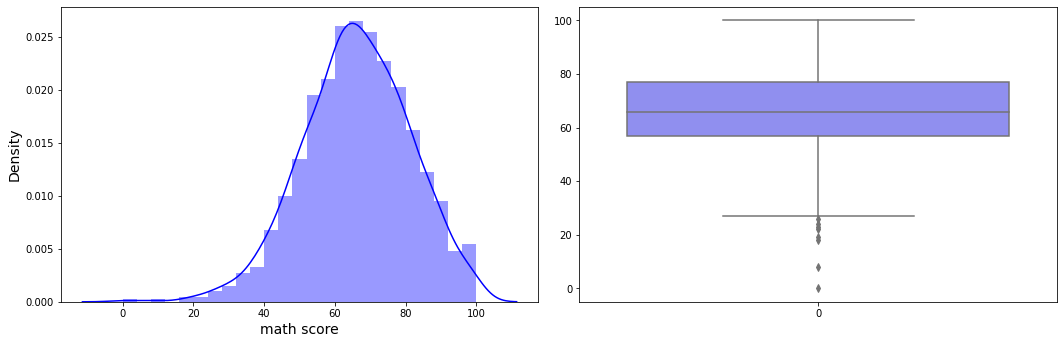

In [51]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(students_num_f['math score'], color='b', ax=ax[0])
sns.boxplot(students_num_f['math score'], palette='cool', ax=ax[1])
save_fig("histograma_matematicas")
plt.show()

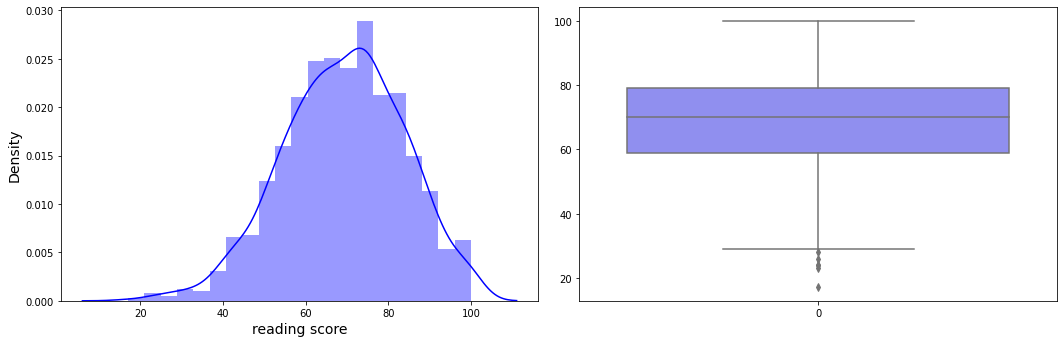

In [52]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(students_num_f['reading score'], color='b', ax=ax[0])
sns.boxplot(students_num_f['reading score'], palette='cool', ax=ax[1])
save_fig("histograma_Lectura")
plt.show()

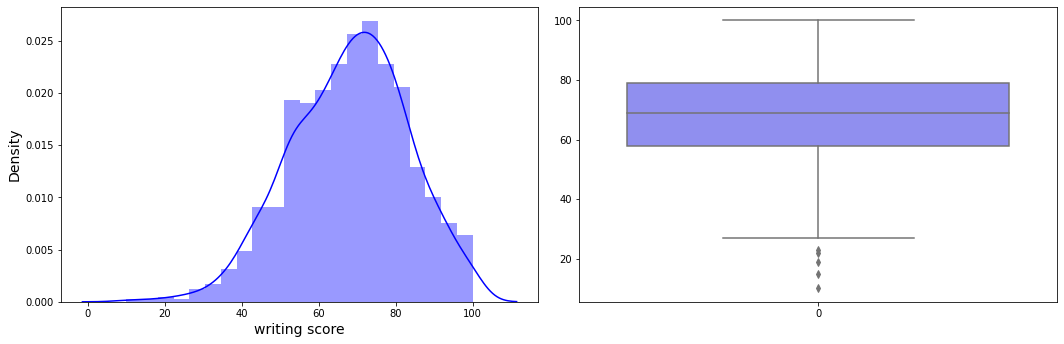

In [53]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(students_num_f['writing score'], color='b', ax=ax[0])
sns.boxplot(students['writing score'], palette='cool', ax=ax[1])
save_fig("histograma_Escritura")
plt.show()

<Axes: >

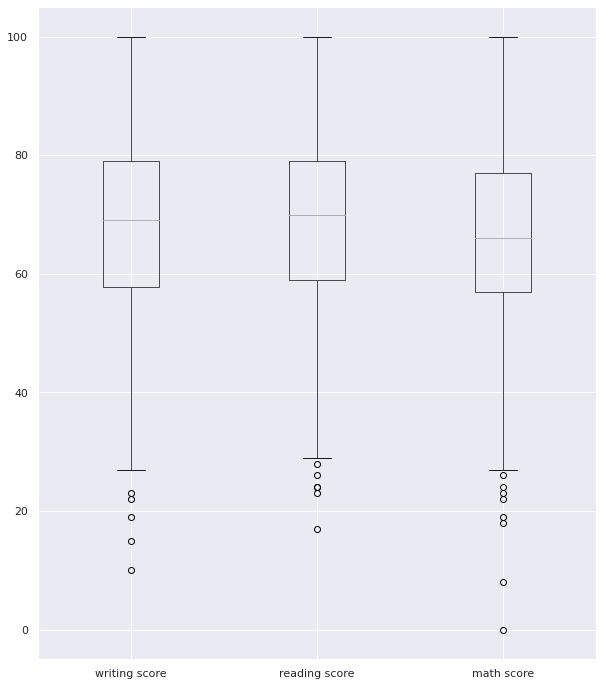

In [54]:
sns.set (rc = {"figure.figsize" :( 10 , 12 )}) # ancho = 10, alto = 12
save_fig("valores_atipicos_score")
students_num_f.boxplot(column=['writing score', 'reading score', 'math score'])

Se puede observar que los resultados de las evaluaciones están concentrados entre las puntuaciones de 55 y 78. Las puntuaciones por fuera de ese rango no son muchas y no deberían elimarse para asegurar un resultado más real.

La visualización del conjunto de datos permite ver la uniformidad y el equilibrio sin la presencia de valures nulos.
Hay mínimos valores atípicos y la distribución también es bastante buena.

In [55]:
students_num_f.describe()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.518000,3.168000,0.645000,0.358000,66.08900,69.169000,68.054000,0.089000,0.190000,0.319000,0.262000,0.140000
std,0.499926,1.572975,0.478753,0.479652,15.16308,14.600192,15.195657,0.284886,0.392497,0.466322,0.439943,0.347161
min,0.000000,1.000000,0.000000,0.000000,0.00000,17.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,57.00000,59.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,0.000000,66.00000,70.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,1.000000,1.000000,77.00000,79.000000,79.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,6.000000,1.000000,1.000000,100.00000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Se puede observar que las calificaciones presentan una media alta (entre 66 y 69) y los resultados obtenidos, en promedio, en la evaluación de lectura son más altos que los objenidos en Matemáticas o en Escritura.

Los resultados promedios, obtenidos en Matemáticas, son más bajos que los obtenidos en Escritura o Lectura.

Se puede determinar cuántas personas aprobaron las evaluaciones, por ejemplo considerando que su calificación fue mínimo de 60 puntos

In [56]:
import numpy as np

students_num_f['Math_PassStatus'] = np.where(students_num_f['math score']>=60, 'A', 'R')
students_num_f.Math_PassStatus.value_counts()

A    677
R    323
Name: Math_PassStatus, dtype: int64

Se tiene entonces que 677 estudiantes aprobaron (con nota >= 60) la evaluación de matemáticas y 323 no la aprobaron.

In [57]:
save_fig("Barras_MATEMÁTICAS")
px.bar(students_num_f.Math_PassStatus.value_counts(), orientation='h', height=300, width=850, title= "RESULTADOS PRUEBA MATEMÁTICAS")

<Figure size 720x864 with 0 Axes>

In [58]:
students_num_f['Reading_PassStatus'] = np.where(students_num_f['reading score']>=60, 'A', 'R')
students_num_f.Reading_PassStatus.value_counts()

A    746
R    254
Name: Reading_PassStatus, dtype: int64

Se tiene entonces que 746 estudiantes aprobaron (con nota >= 60) la evaluación de lectura y 254 no la aprobaron.

In [59]:
save_fig("Barras_LECTURA")
px.bar(students_num_f.Reading_PassStatus.value_counts(), orientation='h', height=300, width=850, title= "RESULTADOS PRUEBA LECTURA")

<Figure size 720x864 with 0 Axes>

In [60]:
students_num_f['Writing_PassStatus'] = np.where(students_num_f['writing score']>=60, 'A', 'R')
students_num_f.Writing_PassStatus.value_counts()

A    719
R    281
Name: Writing_PassStatus, dtype: int64

Se tiene entonces que 719 estudiantes aprobaron (con nota >= 60) la evaluación de Escritura y 281 no la aprobaron.

In [61]:
save_fig("Barras_ESCRITURA")
px.bar(students_num_f.Writing_PassStatus.value_counts(), orientation='h', height=300, width=850, title= "RESULTADOS PRUEBA ESCRITURA")

<Figure size 720x864 with 0 Axes>

In [62]:
students_num_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   parental level of education  1000 non-null   int64 
 2   lunch                        1000 non-null   int64 
 3   test preparation course      1000 non-null   int64 
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   group A                      1000 non-null   int64 
 8   group B                      1000 non-null   int64 
 9   group C                      1000 non-null   int64 
 10  group D                      1000 non-null   int64 
 11  group E                      1000 non-null   int64 
 12  Math_PassStatus              1000 non-null   object
 13  Reading_PassStatus           1000 

## Buscando Correlaciones

Como el conjunto de datos no es demasiado grande, se puede calcular fácilmente el coeficiente de correlación estándar (también llamado r de Pearson) entre cada par de atributos utilizando el método corr():

In [63]:
students_num_f.corr()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E
gender,1.000000,0.047068,-0.021372,-0.006028,-0.167982,0.244313,0.301225,-0.071001,0.028466,0.063368,-0.030566,-0.020302
parental level of education,0.047068,1.000000,-0.012442,0.027671,0.161414,0.195295,0.232843,-0.057971,-0.074452,0.030579,0.021674,0.063205
lunch,-0.021372,-0.012442,1.000000,-0.017044,0.350877,0.229560,0.245769,-0.032329,-0.008257,-0.003385,-0.009458,0.052398
test preparation course,-0.006028,0.027671,-0.017044,1.000000,0.177702,0.241780,0.312946,-0.006315,-0.000106,0.012522,-0.055956,0.059393
math score,-0.167982,0.161414,0.350877,0.177702,1.000000,0.817580,0.802642,-0.091977,-0.084250,-0.073387,0.050071,0.205855
reading score,0.244313,0.195295,0.229560,0.241780,0.817580,1.000000,0.954598,-0.096274,-0.060283,-0.003074,0.035177,0.106712
writing score,0.301225,0.232843,0.245769,0.312946,0.802642,0.954598,1.000000,-0.110714,-0.078254,-0.010203,0.082032,0.089077
group A,-0.071001,-0.057971,-0.032329,-0.006315,-0.091977,-0.096274,-0.110714,1.000000,-0.151381,-0.213923,-0.186234,-0.126110
group B,0.028466,-0.074452,-0.008257,-0.000106,-0.084250,-0.060283,-0.078254,-0.151381,1.000000,-0.331479,-0.288574,-0.195411
group C,0.063368,0.030579,-0.003385,0.012522,-0.073387,-0.003074,-0.010203,-0.213923,-0.331479,1.000000,-0.407797,-0.276145


Así se aprecia la correlación de manera visual.

<Axes: >

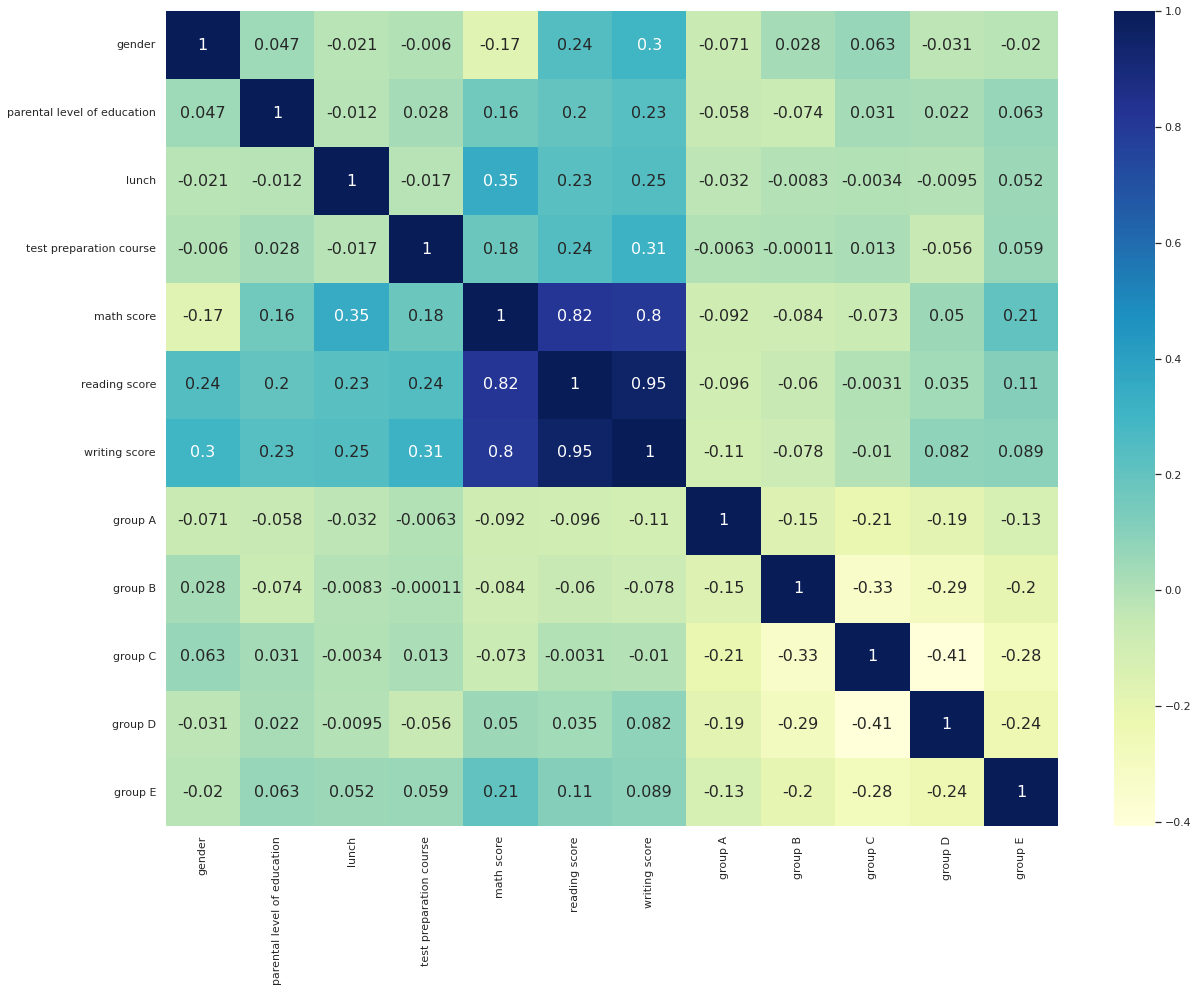

In [64]:
plt.figure(figsize=(20, 15))
plt.rc({'size': '12'})
save_fig("Correlaciones")
sns.heatmap(students_num_f.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":16})

Se observa que hay una relación alta en los resultados de las evaluaciones tanto de Escritura, Lectura y Matemáticas. También se observa una relación entre el grupo Etnico E y sus resultados en las evaluaciones, aunque no es una relación alta. 

In [65]:
corr_matrix = students_num_f.corr()

Ahora puede ver en qué medida cada atributo está correlacionado con los resultados de los estudiantes:

In [66]:
corr_matrix["reading score"].sort_values(ascending=False)  # Esto es exploratorio

reading score                  1.000000
writing score                  0.954598
math score                     0.817580
gender                         0.244313
test preparation course        0.241780
lunch                          0.229560
parental level of education    0.195295
group E                        0.106712
group D                        0.035177
group C                       -0.003074
group B                       -0.060283
group A                       -0.096274
Name: reading score, dtype: float64

Se confirma que hay una relación alta en los resultados de las evaluaciones de lectura con las obtenidas en Escritura y Matemáticas.

In [67]:
corr_matrix["math score"].sort_values(ascending=False)  # Esto es exploratorio

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
group E                        0.205855
test preparation course        0.177702
parental level of education    0.161414
group D                        0.050071
group C                       -0.073387
group B                       -0.084250
group A                       -0.091977
gender                        -0.167982
Name: math score, dtype: float64

Se confirma que hay una relación alta en los resultados de las evaluaciones de Matemáticas con los resultados de Lectura y Escritura.

In [68]:
corr_matrix["writing score"].sort_values(ascending=False)  # Esto es exploratorio

writing score                  1.000000
reading score                  0.954598
math score                     0.802642
test preparation course        0.312946
gender                         0.301225
lunch                          0.245769
parental level of education    0.232843
group E                        0.089077
group D                        0.082032
group C                       -0.010203
group B                       -0.078254
group A                       -0.110714
Name: writing score, dtype: float64

Se confirma que hay una relación alta en los resultados de las evaluaciones de Escritura con los resultados de Lectura y Matemáticas

Si se estima que con un resultado >= a 60 puntos se aprueba una asignatura, se puede graficar ese comportamiento, por ejemplo, en el resultado de Matemáticas frente al Nivel de Educación de los Padres

In [69]:
students_num_f

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,1,4,1,0,72,72,74,0,1,0,0,0,A,A,A
1,1,3,1,1,69,90,88,0,0,1,0,0,A,A,A
2,1,6,1,0,90,95,93,0,1,0,0,0,A,A,A
3,0,5,0,0,47,57,44,1,0,0,0,0,R,R,R
4,0,3,1,0,76,78,75,0,0,1,0,0,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,1,1,88,99,95,0,0,0,0,1,A,A,A
996,0,1,0,0,62,55,55,0,0,1,0,0,A,R,R
997,1,1,0,1,59,71,65,0,0,1,0,0,R,A,A
998,1,3,1,1,68,78,77,0,0,0,1,0,A,A,A


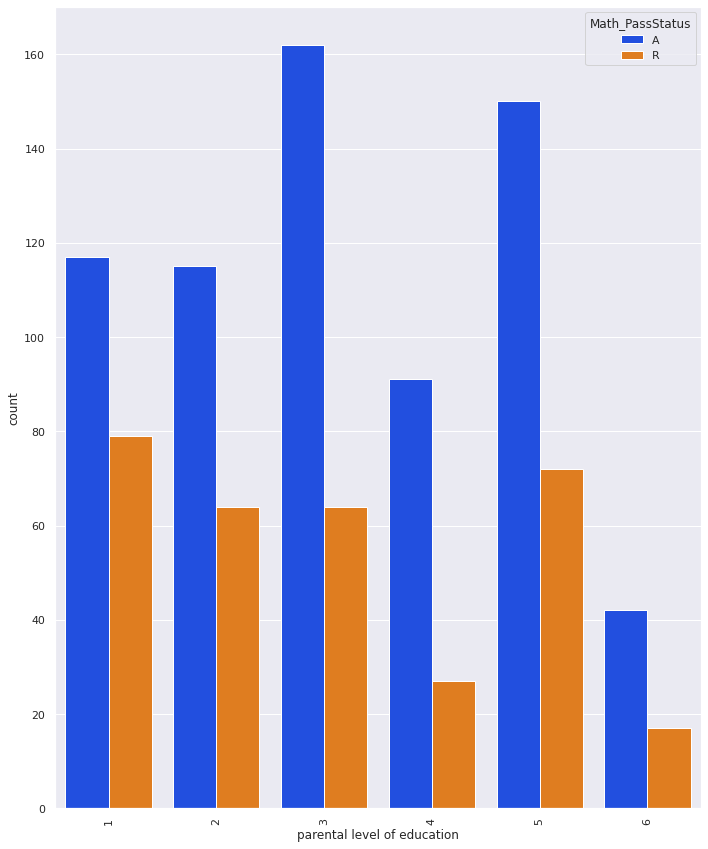

In [70]:
p = sns.countplot(x='parental level of education', data = students_num_f, hue='Math_PassStatus', palette='bright')
save_fig("Aprobados Matem por nivel de Ed_Padres")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Se aprecia que los mejores resultados en las pruebas de Matemáticas fueron obtenidos por los estudiantes cuyos padres tienen 'some college'-3, seguidos por los que tienen grado "associate's degree"-5

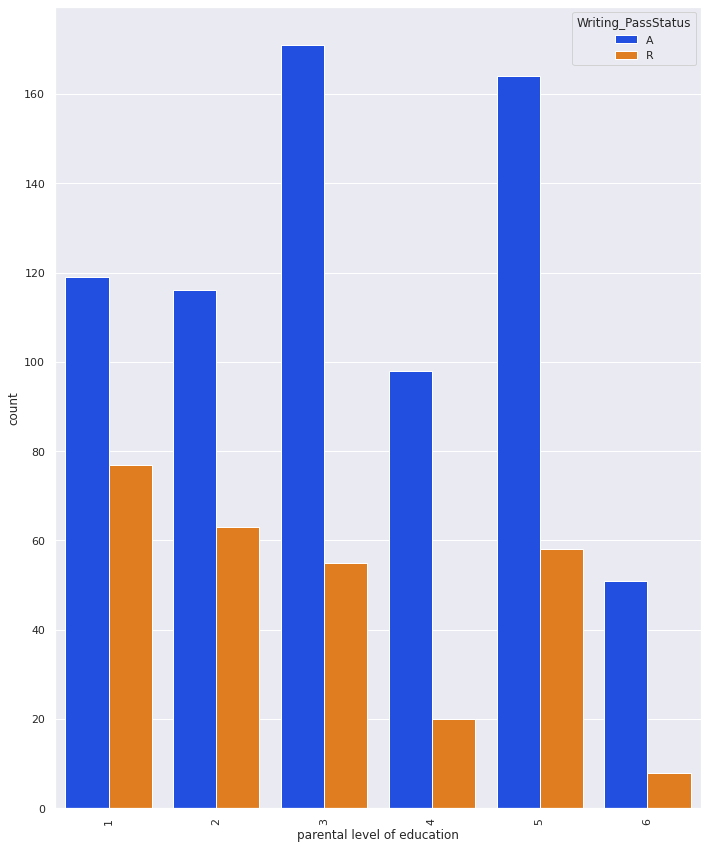

In [71]:
p = sns.countplot(x='parental level of education', data = students_num_f, hue='Writing_PassStatus', palette='bright')
save_fig("Aprobados Escr por nivel de Ed_Padres")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Se aprecia que los mejores resultados en las pruebas de Escritura fueron obtenidos por los estudiantes cuyos padres tienen 'some college'-3, seguidos por los que tienen grado "associate's degree"-5

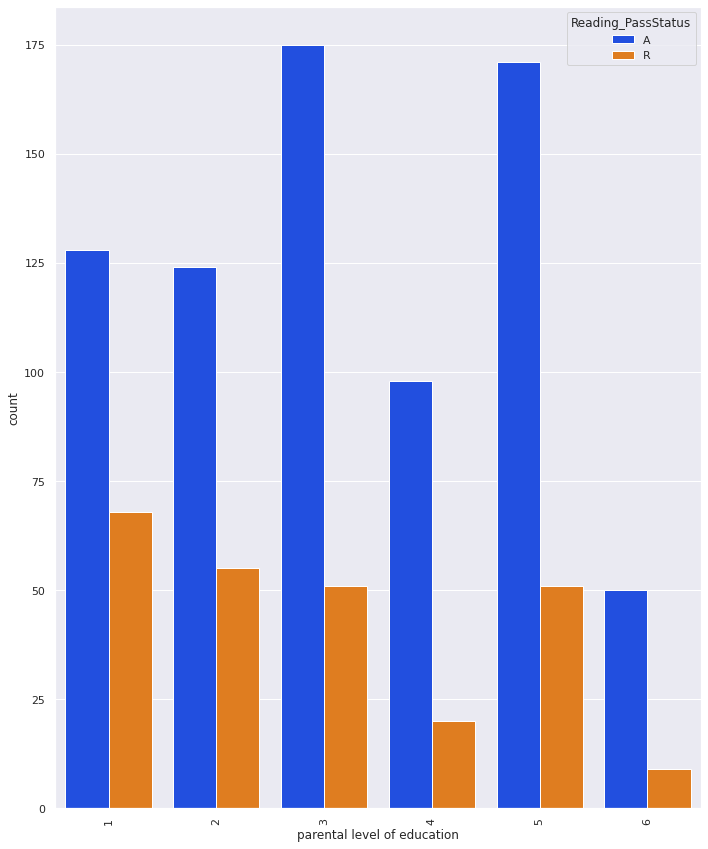

In [72]:
p = sns.countplot(x='parental level of education', data = students_num_f, hue='Reading_PassStatus', palette='bright')
save_fig("Aprobados Lect por nivel de Ed_Padres")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Se aprecia que los mejores resultados en las pruebas de Lectura fueron obtenidos por los estudiantes cuyos padres tienen 'some college'-3, seguidos por los que tienen grado "associate's degree"-5

##Dispersión

<Axes: xlabel='writing score', ylabel='math score'>

<Figure size 720x864 with 0 Axes>

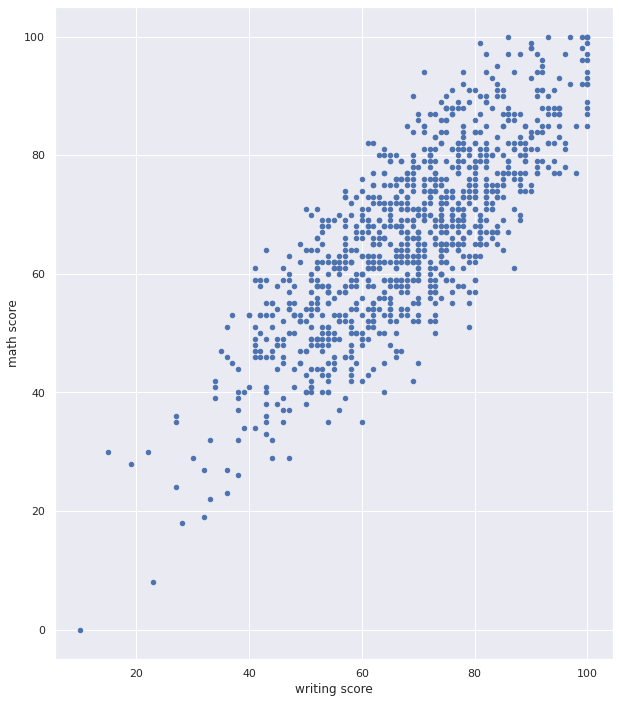

In [73]:
save_fig("Disp_Escritura_Matem")
students_num_f.plot.scatter(x='writing score', y='math score')

Se observa que los estudiantes que lograron altas calificaciones en escritura tambié lo lograron en matemáticas.

<Axes: xlabel='writing score', ylabel='reading score'>

<Figure size 720x864 with 0 Axes>

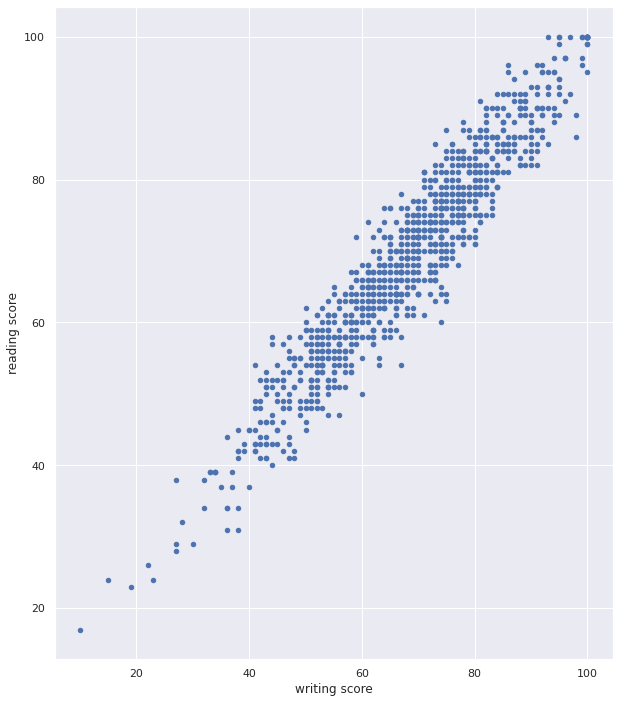

In [74]:
save_fig("Disp_Escritura_Lect")
students_num_f.plot.scatter(x='writing score', y='reading score')

Se observa que los estudiantes que lograron altas calificaciones en escritura también lo lograron en lectura.

<Axes: xlabel='reading score', ylabel='math score'>

<Figure size 720x864 with 0 Axes>

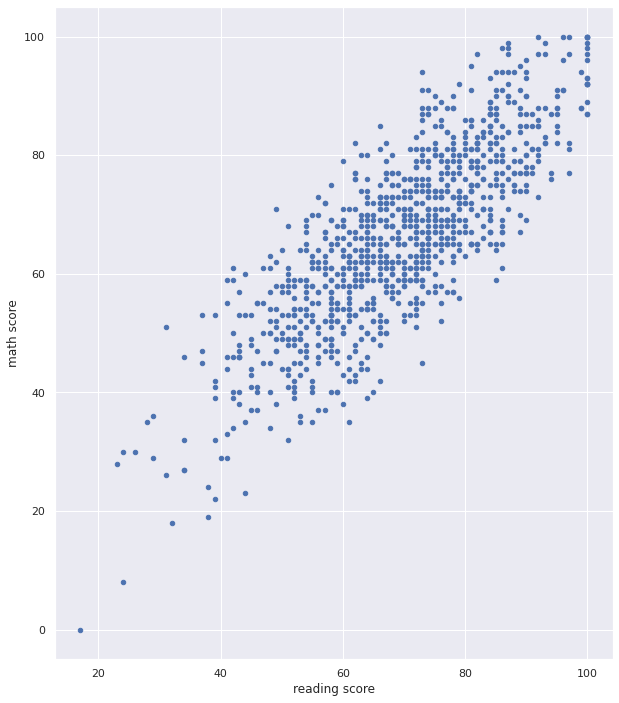

In [75]:
save_fig("Disp_Escritura_Matem")
students_num_f.plot.scatter(x='reading score', y='math score')

Se observa que los estudiantes que lograron altas calificaciones en lectura también lo lograron en matemáticas.

<Axes: xlabel='gender', ylabel='math score'>

<Figure size 720x864 with 0 Axes>

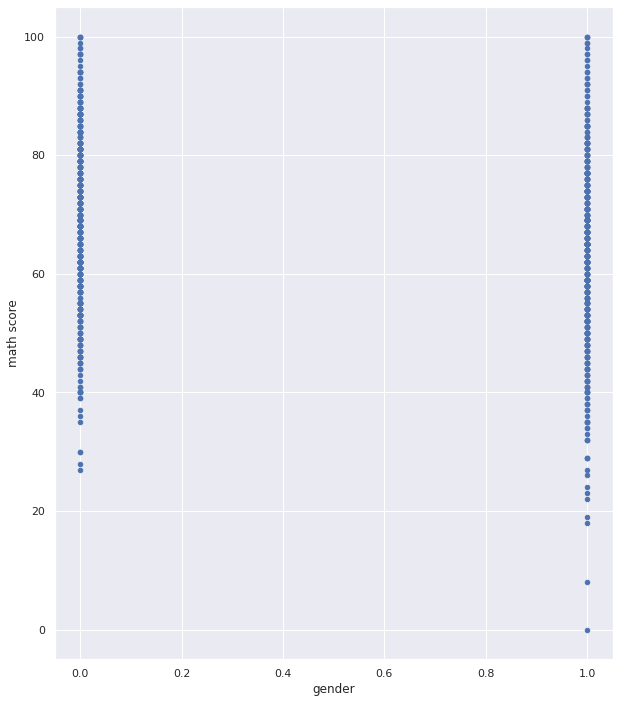

In [76]:
save_fig("Disp_Genero_Matem")
students_num_f.plot.scatter(x='gender', y='math score')

Se observa que el género másculino obtuvo mejores resultados que el género femenino en las evaluaciones de matemáticas.

<Figure size 720x864 with 0 Axes>

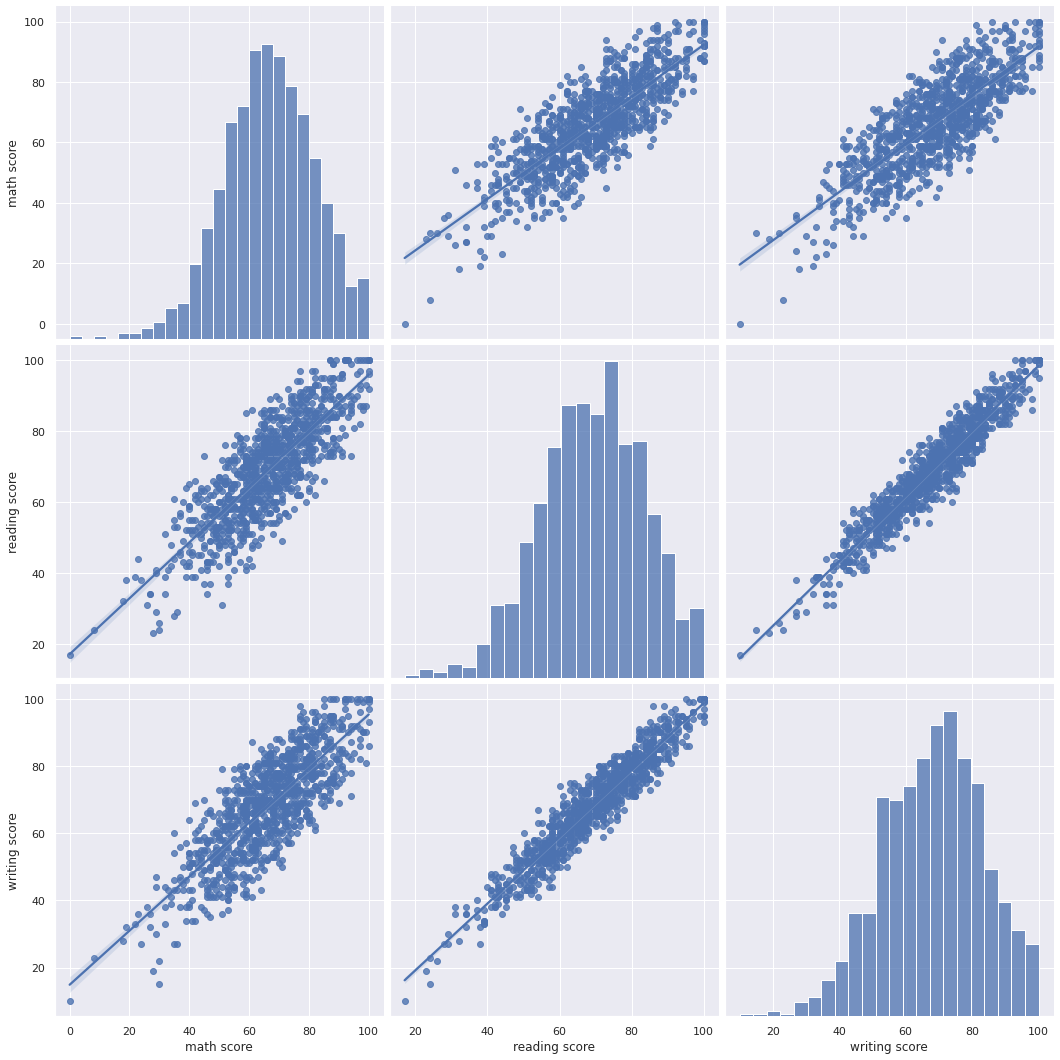

In [77]:
save_fig("Dispersion")
sns.pairplot(students_num_f.dropna(),  height=5, vars=['math score', 'reading score', 'writing score'], kind='reg')

Se observa que hay una gran relación lineal entre los resultados de las diferentes evaluaciones.

** Es importante tener en cuenta los resultados de las tres evaluaciones, por ello se calculará otra característica como el promedio de las tres evaluaciones obtenidas por el estudiante

__Este dato de puntaje promedio de las evaluaciones se convertirá, más adelante, en nuestra variable objetivo.__

In [78]:
students_num_f['promedio_evaluacion'] = (students_num_f['math score']+students_num_f['reading score']+students_num_f['writing score'])/3
students_num_f

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,promedio_evaluacion
0,1,4,1,0,72,72,74,0,1,0,0,0,A,A,A,72.666667
1,1,3,1,1,69,90,88,0,0,1,0,0,A,A,A,82.333333
2,1,6,1,0,90,95,93,0,1,0,0,0,A,A,A,92.666667
3,0,5,0,0,47,57,44,1,0,0,0,0,R,R,R,49.333333
4,0,3,1,0,76,78,75,0,0,1,0,0,A,A,A,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,1,1,88,99,95,0,0,0,0,1,A,A,A,94.000000
996,0,1,0,0,62,55,55,0,0,1,0,0,A,R,R,57.333333
997,1,1,0,1,59,71,65,0,0,1,0,0,R,A,A,65.000000
998,1,3,1,1,68,78,77,0,0,0,1,0,A,A,A,74.333333


<Figure size 720x864 with 0 Axes>

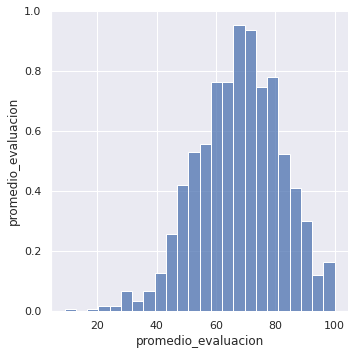

In [79]:
save_fig("Dispersion_Promedio_evaluacion")
sns.pairplot(students_num_f.dropna(),  height=5, vars=['promedio_evaluacion'], kind='reg')

In [80]:
save_fig("Barras_Promedio_Evaluación")
px.bar(students_num_f['promedio_evaluacion'].value_counts(), orientation='v', height=300, width=850, title= "Promedio_Evaluación")

<Figure size 720x864 with 0 Axes>

In [81]:
students_num_f['Promedio_PassStatus'] = np.where(students_num_f['promedio_evaluacion']>=60, 'A', 'R')
students_num_f.Promedio_PassStatus.value_counts()

A    715
R    285
Name: Promedio_PassStatus, dtype: int64

In [82]:
save_fig("Barras_PROMEDIO_EVAL")
px.bar(students_num_f.Promedio_PassStatus.value_counts(), orientation='h', height=300, width=850, title= "RESULTADOS PROMEDIOS PRUEBAS")

<Figure size 720x864 with 0 Axes>

In [83]:
students_num_f

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,promedio_evaluacion,Promedio_PassStatus
0,1,4,1,0,72,72,74,0,1,0,0,0,A,A,A,72.666667,A
1,1,3,1,1,69,90,88,0,0,1,0,0,A,A,A,82.333333,A
2,1,6,1,0,90,95,93,0,1,0,0,0,A,A,A,92.666667,A
3,0,5,0,0,47,57,44,1,0,0,0,0,R,R,R,49.333333,R
4,0,3,1,0,76,78,75,0,0,1,0,0,A,A,A,76.333333,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,1,1,88,99,95,0,0,0,0,1,A,A,A,94.000000,A
996,0,1,0,0,62,55,55,0,0,1,0,0,A,R,R,57.333333,R
997,1,1,0,1,59,71,65,0,0,1,0,0,R,A,A,65.000000,A
998,1,3,1,1,68,78,77,0,0,0,1,0,A,A,A,74.333333,A


In [84]:
#X2 = students_num_f.drop('promedio_evaluacion', axis=1)
students_num_f = students_num_f.drop('Math_PassStatus', axis=1)
students_num_f = students_num_f.drop('Reading_PassStatus', axis=1)
students_num_f = students_num_f.drop('Writing_PassStatus', axis=1)
students_num_f = students_num_f.drop('Promedio_PassStatus', axis=1)
#students_num_f = students_num_f.drop('promedio_evaluacion', axis=1)
students_num_f = students_num_f.drop('reading score', axis=1)
students_num_f = students_num_f.drop('math score', axis=1)
students_num_f = students_num_f.drop('writing score', axis=1)
X = students_num_f.drop('promedio_evaluacion', axis=1)
y = students_num_f['promedio_evaluacion']

In [85]:
X.shape, y.shape

((1000, 9), (1000,))

In [86]:
X

,gender,parental level of education,lunch,test preparation course,group A,group B,group C,group D,group E
0,1,4,1,0,0,1,0,0,0
1,1,3,1,1,0,0,1,0,0
2,1,6,1,0,0,1,0,0,0
3,0,5,0,0,1,0,0,0,0
4,0,3,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,1,6,1,1,0,0,0,0,1
996,0,1,0,0,0,0,1,0,0
997,1,1,0,1,0,0,1,0,0
998,1,3,1,1,0,0,0,1,0


In [87]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: promedio_evaluacion, Length: 1000, dtype: float64

#Crear conjuntos de datos para entrenamiento y pruebas

Se separan los datos para entrenamiento (70%) y para Pruebas (30%)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Longitud de X_train = ", len(X_train), "Longitud de X_test = ", len(X_test), "Longitud de y_train = ", len(y_train), "Longitud de y_test = ", len(y_test))  

Longitud de X_train =  700 Longitud de X_test =  300 Longitud de y_train =  700 Longitud de y_test =  300


Los datos  entrenamiento se deja un 10% para validación

In [89]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=42)
print("Longitud de X_test = ", len(X_test), "Longitud de X_val = ", len(X_val), "Longitud de y_test = ", len(y_test), "Longitud de y_val = ", len(y_val)) 

Longitud de X_test =  270 Longitud de X_val =  30 Longitud de y_test =  270 Longitud de y_val =  30


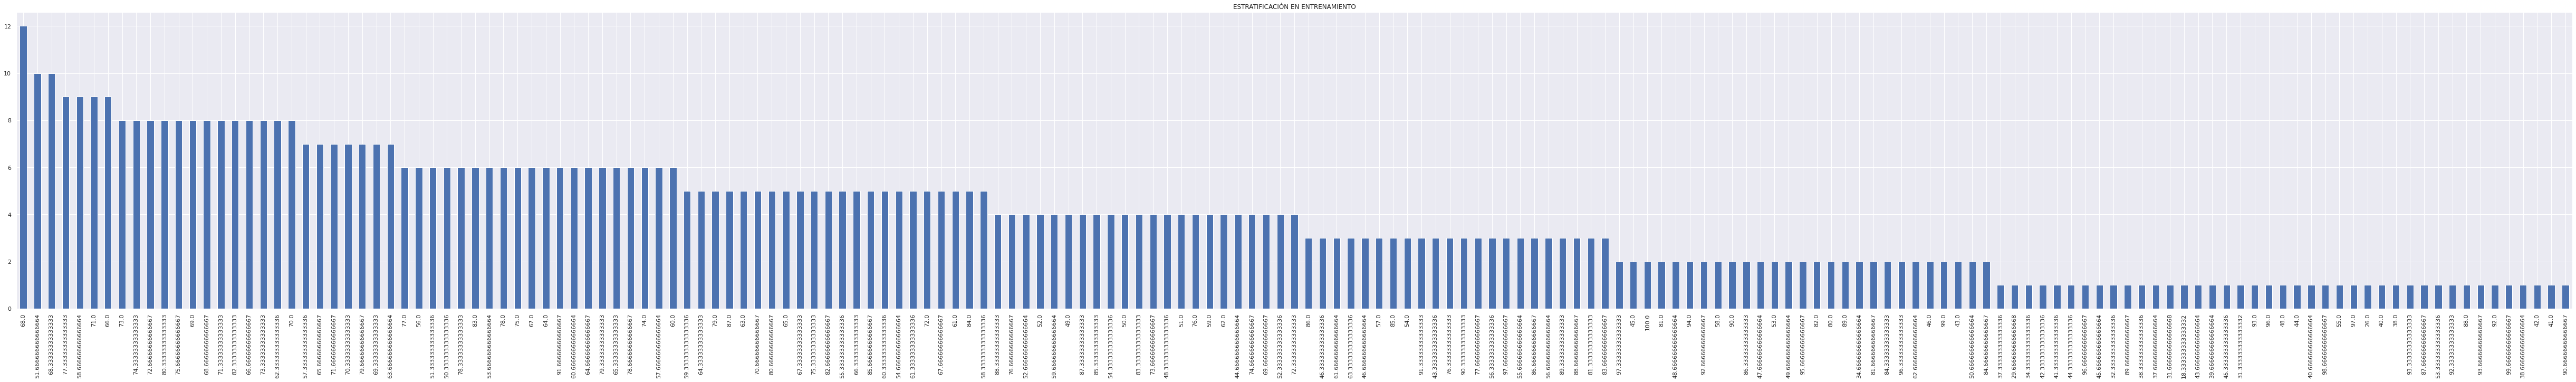

In [90]:
y_train.value_counts().plot(kind='bar', figsize=(68,10))
save_fig("Estatificación Y_train")  
plt.title("ESTRATIFICACIÓN EN ENTRENAMIENTO");
plt.show()

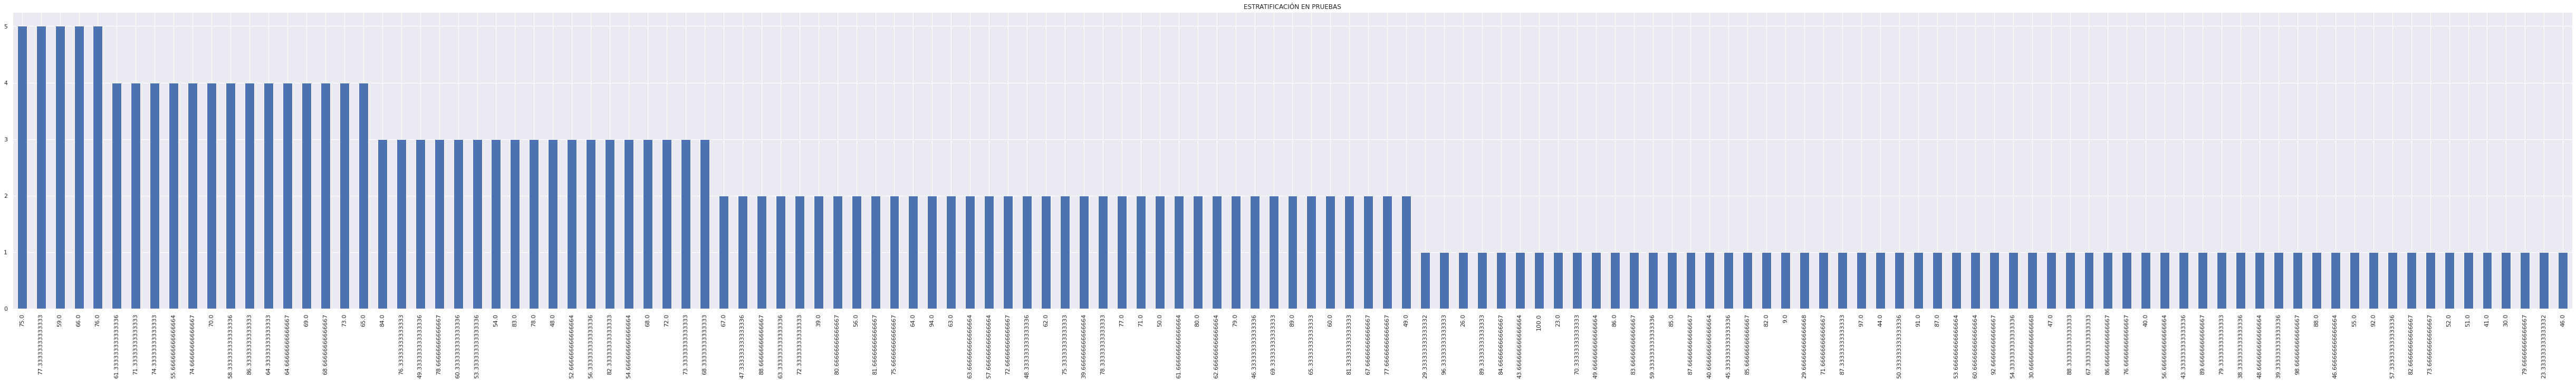

In [91]:
y_test.value_counts().plot(kind='bar', figsize=(68,10))
save_fig("Estatificación Y_test")  
plt.title("ESTRATIFICACIÓN EN PRUEBAS");
plt.show()

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental level of education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test preparation course      1000 non-null   int64
 4   group A                      1000 non-null   int64
 5   group B                      1000 non-null   int64
 6   group C                      1000 non-null   int64
 7   group D                      1000 non-null   int64
 8   group E                      1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [93]:

# Lista columnas con datos categóricos
#X2_data_categoricos = ['gender', 'race/ethnicity','parental level of education','lunch','test preparation course']
X_data_categoricos = []
X_data_categoricos

[]

In [94]:
# Para normalizar los datos númericos se utiliza la herramienta StandardScaler el cual obtiene el valor medio y lo divide por la desviación estandar.
# Lista columnas con datos númericos
#X2_data_num = ['math score','reading score','writing score'] 
X_data_num = ['gender','parental level of education', 'lunch', 'test preparation course', 'group A', 'group B', 'group C', 'group D', 'group E']
X_data_num

['gender',
 'parental level of education',
 'lunch',
 'test preparation course',
 'group A',
 'group B',
 'group C',
 'group D',
 'group E']

In [95]:
# Pipeline permiten realizar el proceso de limpieza, normalización y transformación de datos categórico

num_pipeline = Pipeline([("standardize", StandardScaler())])
cat_pipeline = Pipeline([("categoricos", OneHotEncoder())])

In [96]:
#ColumnTransformer permite aplicar los pipeline especificando las columnas del dataset

transformer = ColumnTransformer([('Numerico',num_pipeline,X_data_num),('Categorico', cat_pipeline, X_data_categoricos)])

In [97]:
X

,gender,parental level of education,lunch,test preparation course,group A,group B,group C,group D,group E
0,1,4,1,0,0,1,0,0,0
1,1,3,1,1,0,0,1,0,0
2,1,6,1,0,0,1,0,0,0
3,0,5,0,0,1,0,0,0,0
4,0,3,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,1,6,1,1,0,0,0,0,1
996,0,1,0,0,0,0,1,0,0
997,1,1,0,1,0,0,1,0,0
998,1,3,1,1,0,0,0,1,0


In [98]:
# Con fit_transform los datos quedan transformados y escalados
X_tf_train = transformer.fit_transform(X_train)  

In [99]:
X_tf_train

array([[-1.07417231,  1.17424365, -1.38005953, ..., -0.69275929,
         1.68705478, -0.41772795],
       [ 0.93094934, -0.10409314,  0.72460642, ...,  1.44350284,
        -0.59274898, -0.41772795],
       [-1.07417231, -0.10409314, -1.38005953, ...,  1.44350284,
        -0.59274898, -0.41772795],
       ...,
       [ 0.93094934,  1.17424365,  0.72460642, ...,  1.44350284,
        -0.59274898, -0.41772795],
       [-1.07417231, -0.10409314, -1.38005953, ...,  1.44350284,
        -0.59274898, -0.41772795],
       [ 0.93094934,  1.17424365,  0.72460642, ..., -0.69275929,
         1.68705478, -0.41772795]])

In [100]:
X_tf_test = transformer.transform(X_test)
X_tf_test

array([[-1.07417231,  0.53507526, -1.38005953, ..., -0.69275929,
         1.68705478, -0.41772795],
       [-1.07417231, -0.10409314,  0.72460642, ..., -0.69275929,
         1.68705478, -0.41772795],
       [-1.07417231, -0.10409314,  0.72460642, ..., -0.69275929,
        -0.59274898,  2.39390251],
       ...,
       [-1.07417231,  1.17424365,  0.72460642, ..., -0.69275929,
        -0.59274898,  2.39390251],
       [ 0.93094934,  1.17424365, -1.38005953, ..., -0.69275929,
        -0.59274898, -0.41772795],
       [-1.07417231,  1.17424365,  0.72460642, ..., -0.69275929,
        -0.59274898, -0.41772795]])

In [101]:
X_tf_val = transformer.transform(X_val)
X_tf_val

array([[-1.07417231,  1.81341205, -1.38005953, -0.74072435, -0.29773641,
        -0.47756693,  1.44350284, -0.59274898, -0.41772795],
       [-1.07417231, -0.10409314,  0.72460642, -0.74072435, -0.29773641,
        -0.47756693, -0.69275929, -0.59274898,  2.39390251],
       [-1.07417231,  1.17424365,  0.72460642, -0.74072435, -0.29773641,
        -0.47756693,  1.44350284, -0.59274898, -0.41772795],
       [-1.07417231, -0.74326154,  0.72460642,  1.35002987, -0.29773641,
         2.09394732, -0.69275929, -0.59274898, -0.41772795],
       [-1.07417231,  1.17424365, -1.38005953,  1.35002987,  3.3586756 ,
        -0.47756693, -0.69275929, -0.59274898, -0.41772795],
       [ 0.93094934,  1.81341205,  0.72460642, -0.74072435, -0.29773641,
        -0.47756693, -0.69275929,  1.68705478, -0.41772795],
       [-1.07417231,  1.17424365,  0.72460642,  1.35002987, -0.29773641,
        -0.47756693, -0.69275929, -0.59274898,  2.39390251],
       [ 0.93094934, -1.38242993,  0.72460642, -0.74072435, -0

Quedan listos los datos de entrenamiento y prueba para ser utilizados por los modelos.

# Creación de modelos


Se selecciona el modelo "RandomForestRegressor", con los siguientes parámetros iniciales:

            n_estimators = 10,  # número de árboles
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 20

Los parámetros e hiperparámetros empleados por defecto, generalmente, son:

n_estimators=100
criterion='mse'
max_depth=None
min_samples_split=2
min_samples_leaf=1
min_weight_fraction_leaf=0.0
max_features='auto'
max_leaf_nodes=None
min_impurity_decrease=0.0
min_impurity_split=None
bootstrap=True
oob_score=False
n_jobs=None
random_state=None
verbose=0
warm_start=False
ccp_alpha=0.0
max_samples=None

In [102]:
nombre_modelos=[]
mse_modelos=[]
modelo = RandomForestRegressor(
            n_estimators = 10,  # número de árboles
            criterion    = 'squared_error', #'absolute_error',
            max_depth    = None, #profundidad máxima que pueden alcanzar los árboles.
            max_features = 'auto', # número de predictores considerados a en cada división
            oob_score    = False, #Si se calcula o no el out-of-bag R^2. Por defecto es False ya que aumenta el tiempo de entrenamiento.
            n_jobs       = -1, #número de cores empleados para el entrenamiento.  Con -1 se utilizan todos los cores disponibles.
            random_state = 20 #semilla para que los resultados sean reproducibles
         )

Entrenar el modelo

In [103]:
modelo.fit(X_tf_train, y_train)

RandomForestRegressor(max_features='auto', n_estimators=10, n_jobs=-1,
                      random_state=20)

Predicción y evaluación del modelo

Una vez entrenado el modelo, se puede evaluar la capacidad predictiva empleando el conjunto de test.

In [104]:

predicciones = modelo.predict(X = X_tf_test)

rmse_fores = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = True #False
       )
print(f"El error cuadrático medio (rmse) de test es: {rmse_fores}")
nombre_modelos.append("RandomForest_initial")
mse_modelos.append(rmse_fores)

El error cuadrático medio (rmse) de test es: 232.18047101160445


In [105]:
nombre_modelos

['RandomForest_initial']

In [106]:
mse_modelos

[232.18047101160445]

Este error cuadrático medio RMSE es una medida absoluta de ajuste y se.

Validación empleando el Out-of-Bag error

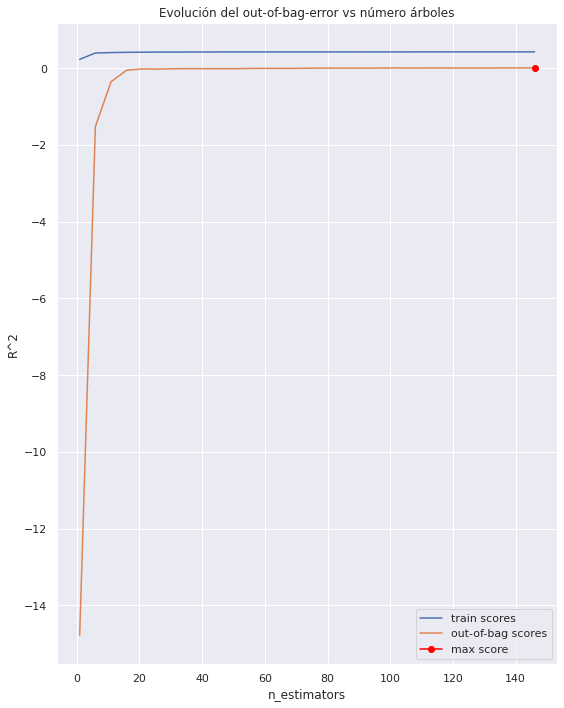

In [107]:
# Validación empleando el Out-of-Bag error
# también llamado estimación fuera de bolsa , es un método para medir el error de predicción 
# de bosques aleatorios , árboles de decisión potenciados y otros modelos de aprendizaje automático 
# que utilizan agregación de arranque (empaquetado). El embolsado usa submuestreo con reemplazo 
# para crear muestras de entrenamiento para que el modelo aprenda. 
# El error OOB es el error de predicción medio en cada muestra de entrenamiento x i , utilizando solo los árboles que no tenían x i en su muestra de arranque.
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error', #'absolute_error',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 20
             )
    modelo.fit(X_tf_train, y_train)
    train_scores.append(modelo.score(X_tf_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(8, 10))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
save_fig("Evolución del out-of-bag-error vs número árbolesL")
plt.legend();


In [108]:
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

Valor óptimo de n_estimators: 146


El max score se alcanza con 146. <br>
La puntuación OOB se calcula como el número de filas pronosticadas correctamente de la muestra "out of bag sample".<br>  El puntaje OOB se calcula sobre datos que no se usaron necesariamente en el análisis del modelo, mientras que para el puntaje de validación del cálculo, una parte del conjunto de datos de entrenamiento original se reserva antes de entrenar los modelos. 

En Random Forest, el número de árboles no es un hiperparámetro crítico en cuanto que, añadir árboles, solo puede hacer que mejore el resultado. En Random Forest no se produce overfitting por exceso de árboles, pero, añadir árboles una vez que la mejora se estabiliza es gasto en recursos computacionales.

## Definición de la GRILLA con Random Forest

In [109]:
n_estimator = [i**2 for i in range (2,33,2)]  # número de árboles

In [110]:
max_depth    = [i*2 for i in range (1,16)] #profundidad máxima que pueden alcanzar los árboles.
max_depth   = max_depth    + [None]

In [111]:
params_grid_rf= {'n_estimators':n_estimator, 'max_depth':max_depth}
print("Hiperparámetro n_estimators: ",params_grid_rf['n_estimators'])
print("Hiperparámetro max_depth: ",params_grid_rf['max_depth'])

Hiperparámetro n_estimators:  [4, 16, 36, 64, 100, 144, 196, 256, 324, 400, 484, 576, 676, 784, 900, 1024]
Hiperparámetro max_depth:  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, None]


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#grid_rf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid =params_grid_rf)  RandomForestRegressor
grid_rf = GridSearchCV(RandomForestRegressor(random_state=123), param_grid =params_grid_rf) 

In [113]:
grid_rf.fit(X_tf_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, None],
                         'n_estimators': [4, 16, 36, 64, 100, 144, 196, 256,
                                          324, 400, 484, 576, 676, 784, 900,
                                          1024]})

In [114]:
grid_rf.best_score_

0.16569480734296924

In [115]:
grid_rf.best_params_

{'max_depth': 4, 'n_estimators': 676}

In [116]:
grid_rf.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=676, random_state=123)

La grilla permite establecer max_depth=4 y n_estimators=676 son los mejores parámetros.

## Un segundo modelo clásico es la Regresión Lineal Ridge

In [117]:
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}
preprocessor = None
pipe = Pipeline(
        [('preprocessing', preprocessor),
        ('interactions', PolynomialFeatures(degree=2)),
        ('modelo', Ridge())])

In [118]:
# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    ='neg_root_mean_squared_error',
        n_jobs     = -1, #multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

In [119]:
grid.fit(X = X_tf_train, y = y_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('preprocessing', None),
                                             ('interactions',
                                              PolynomialFeatures()),
                                             ('modelo', Ridge())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'modelo__alpha': array([1.00000000e-05, 1.04722519e-05, 1.09668060e-05, 1.14847155e-05,
       1.20270833e-05, 1.25950646e-05, 1.31898690...
       4.16139055e+04, 4.35791301e+04, 4.56371628e+04, 4.77923865e+04,
       5.00493910e+04, 5.24129830e+04, 5.48881961e+04, 5.74803016e+04,
       6.01948197e+04, 6.30375315e+04, 6.60144909e+04, 6.91320378e+04,
       7.23968114e+04, 7.58157646e+04, 7.93961785e+04, 8.31456781e+04,
       8.70722485e+04, 9.11842520e+04, 9.54904456e+04, 1.00000000e+05])},
                   random_state=123, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [120]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
1,56.690073,-12.579994,0.506832,-11.940871,0.123115


Este modelo muestra un std_train_score = 0.1683

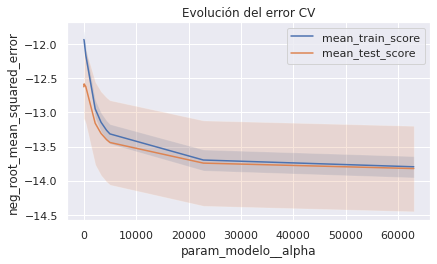

In [121]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
save_fig("Evolución del error CV")
ax.set_ylabel(metrica);

La gráfica muestra que tanto en entrenamiento como en pruebas el error desciende

In [122]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_tf_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 13.46283273653566


Se aprecia que con el mejor estimador, el error (rmse) de test es: 13.46283273653566

Se puede construir el siguiente código para validar varios modelos y comparar sus métricas de score

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear una lista de modelos para comparar
models = [('Linear Regression', LinearRegression()),
          ('Decision Tree Regressor', DecisionTreeRegressor()),
          ('Random Forest Regressor', RandomForestRegressor())]
# Iterar sobre cada modelo
for name, model in models:
    # Entrenar el modelo
    model.fit(X_tf_train, y_train)
    # Predecir valores en el conjunto de prueba
    y_pred = model.predict(X_tf_test)
    # Calcular el error cuadrático medio
    mse = mean_squared_error(y_test, y_pred)
    # Imprimir los resultados
    nombre_modelos.append(name)
    mse_modelos.append(mse)
    print(name + ' MSE: ' + str(mse))


Linear Regression MSE: 176.01489602687045
Decision Tree Regressor MSE: 238.7286487608575
Random Forest Regressor MSE: 223.92956023914243


Se concluye que validando diferentes modelos, el Decision Tree Regressor tiene el mayor MSE y el menor lo tiene Linear Regression
---



In [124]:
#fin_models
for i in range (len(nombre_modelos)):
    print("Modelo ",nombre_modelos[i], " y  su valor de mse: ", mse_modelos[i])

Modelo  RandomForest_initial  y  su valor de mse:  232.18047101160445
Modelo  Linear Regression  y  su valor de mse:  176.01489602687045
Modelo  Decision Tree Regressor  y  su valor de mse:  238.7286487608575
Modelo  Random Forest Regressor  y  su valor de mse:  223.92956023914243


<Axes: title={'center': 'COMPARACIÓN MSE MODELOS'}, xlabel='Nombre'>

<Figure size 720x864 with 0 Axes>

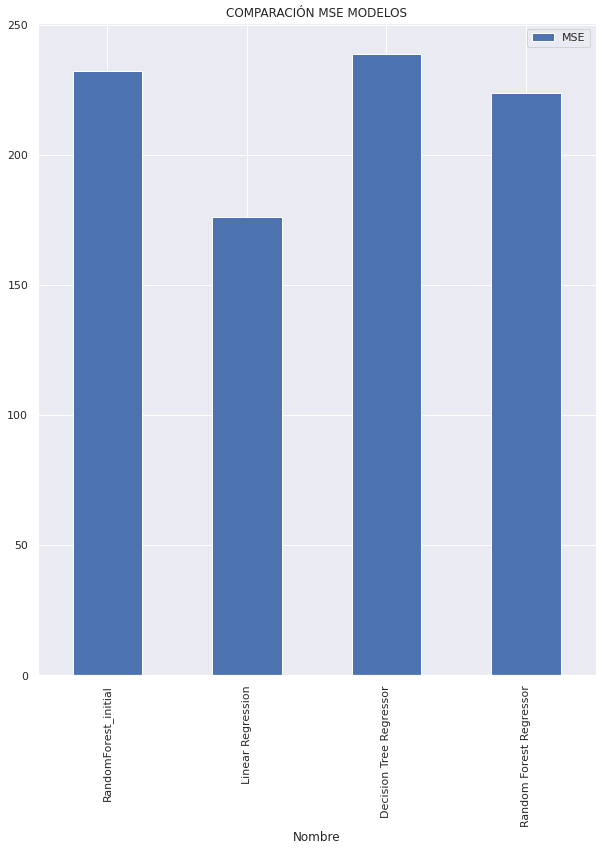

In [125]:
datos = {'Nombre': nombre_modelos, 'MSE': mse_modelos}
dfx = pd.DataFrame(datos)
save_fig("COMPARACIÓN_MSE_MODELOS")
dfx.plot(kind='bar', x='Nombre', y='MSE', title= "COMPARACIÓN MSE MODELOS")

# RED NEURONAL

In [126]:
# Visualizo X
X

,gender,parental level of education,lunch,test preparation course,group A,group B,group C,group D,group E
0,1,4,1,0,0,1,0,0,0
1,1,3,1,1,0,0,1,0,0
2,1,6,1,0,0,1,0,0,0
3,0,5,0,0,1,0,0,0,0
4,0,3,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,1,6,1,1,0,0,0,0,1
996,0,1,0,0,0,0,1,0,0
997,1,1,0,1,0,0,1,0,0
998,1,3,1,1,0,0,0,1,0


In [127]:
# Normalizo datos en X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [128]:
# tamanp de X
X.shape

(1000, 9)

In [129]:
X.describe()

,gender,parental level of education,lunch,test preparation course,group A,group B,group C,group D,group E
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.518000,3.168000,0.645000,0.358000,0.089000,0.190000,0.319000,0.262000,0.140000
std,0.499926,1.572975,0.478753,0.479652,0.284886,0.392497,0.466322,0.439943,0.347161
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Construcción de la Red Neuronal

In [130]:
# Construir modelo de red neuronal
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[9]) #número de características
])
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')


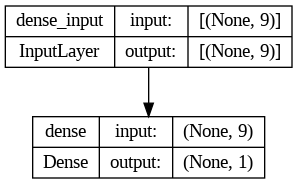

<Figure size 720x864 with 0 Axes>

In [131]:
save_fig("RED NEURONAL_1")
plot_model(model, to_file='model.png',show_shapes=True)

In [132]:
model.fit(X_tf_train, y_train, epochs=10, verbose=1)

Epoch 1/10
22/22 [==============================] - 1s 2ms/step - loss: 3682.8232
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 1641.0150
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 636.9532
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 273.8117
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 174.9550
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 155.0247
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 153.5532
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 152.7712
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 151.7548
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 153.5040


In [133]:
# Evaluación del modelo en datos de entrenamiento
t=model.evaluate(X_tf_train, y_train)
nombre_modelos.append("Red Neuronal Simple 10 épocas")
mse_modelos.append(t)

22/22 [==============================] - 0s 2ms/step - loss: 150.0239


In [134]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [135]:
y_valida = model.predict(X_tf_test)
#primeras 10 predicciones
y_valida[0:10]

9/9 [==============================] - 0s 2ms/step


array([[61.00863 ],
       [77.21132 ],
       [71.3351  ],
       [67.32793 ],
       [66.75349 ],
       [66.277756],
       [74.9925  ],
       [58.97042 ],
       [57.85814 ],
       [60.01888 ]], dtype=float32)

In [136]:
# Entrenamiento del modelo para 10 épocas
history = model.fit(X_tf_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
18/18 [==============================] - 0s 8ms/step - loss: 151.2249 - val_loss: 165.2179
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 147.8377 - val_loss: 164.4430
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 149.0009 - val_loss: 168.0775
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 149.8744 - val_loss: 164.0444
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 149.4796 - val_loss: 168.8654
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 148.4183 - val_loss: 169.6874
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 149.8319 - val_loss: 161.7668
Epoch 8/10
18/18 [==============================] - 0s 5ms/step - loss: 150.1071 - val_loss: 171.5880
Epoch 9/10
18/18 [==============================] - 0s 5ms/step - loss: 149.9104 - val_loss: 163.6559
Epoch 10/10
18/18 [==============================] - 0s 4ms/step - loss: 148.9271 

In [137]:
# Evaluación del modelo en datos de entrenamiento
t=model.evaluate(X_tf_train, y_train)
nombre_modelos.append("Red Neuronal Simple 50 épocas Train")
mse_modelos.append(t)

22/22 [==============================] - 0s 2ms/step - loss: 149.9878


In [138]:
# Evaluación del modelo en datos de prueba
t=model.evaluate(X_tf_test, y_test)
nombre_modelos.append("Red Neuronal Simple 50 épocas Test")
mse_modelos.append(t)

9/9 [==============================] - 0s 2ms/step - loss: 176.2991


In [139]:
X_test[0]

array([-1.07417231,  0.53507526, -1.38005953, -0.74072435, -0.29773641,
       -0.47756693, -0.69275929,  1.68705478, -0.41772795])

In [140]:
y_pred = model.predict(X_tf_val)
#primeras 10 predicciones
y_pred[0:10]

1/1 [==============================] - 0s 26ms/step


array([[60.851093],
       [69.864006],
       [68.69571 ],
       [70.70801 ],
       [64.03356 ],
       [75.17192 ],
       [78.41708 ],
       [68.14912 ],
       [62.32665 ],
       [62.7046  ]], dtype=float32)

__Se observa que está realizando predicciones de manera correcta sobre datos que no conoce__

In [141]:
# sumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [142]:
# Definir la carpeta donde se guarda el modelo y su nombre.
# En este caso se guarda en el mismo directorio que contiene este script
nombre_model = 'RNS.h5'

# Guardamos el modelo y todos los pesos entrenados
model.save(nombre_model)

# RED NEURONAL PROFUNDA

In [143]:
# Creación del nodelo
modelrn = Sequential()
#modelrn.add(Dense(256,input_dim=X_train.shape[1], activation = 'relu'))
modelrn.add(Dense(16,input_dim=9, activation = 'relu'))
modelrn.add(Dense(256,activation = 'relu'))
modelrn.add(Dense(256,activation = 'relu'))
modelrn.add(Dense(128,activation = 'relu'))
modelrn.add(Dropout(0.2))
modelrn.add(Dense(1,activation = 'sigmoid')) #capa de salida 

Ahora compilo el modelo con 

optimizer='adam'

loss='mean_squared_error'



In [144]:
#modelrn.compile(optimizer='adam', loss='categorical_crossentropy')
modelrn.compile(optimizer='adam', loss='mean_squared_error')

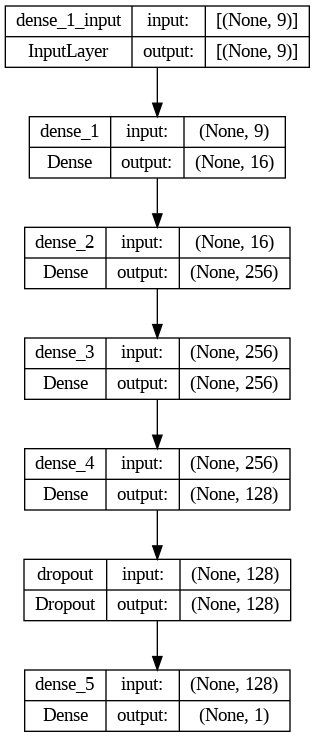

<Figure size 720x864 with 0 Axes>

In [145]:
save_fig("RED NEURONAL PROFUNDA")
plot_model(modelrn, to_file='modelrn.png',show_shapes=True)

In [146]:
modelhistory=model.fit(X_tf_train, y_train
                      ,
                       #validation_data = (X_tf_val,y_val),
                        epochs=50, batch_size=1024)


Epoch 1/50
1/1 [==============================] - 0s 15ms/step - loss: 149.9878
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: 150.2362
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 150.4462
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 150.5821
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 150.6251
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 150.5724
Epoch 7/50
1/1 [==============================] - 0s 11ms/step - loss: 150.4348
Epoch 8/50
1/1 [==============================] - 0s 8ms/step - loss: 150.2327
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 149.9918
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 149.7392
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 149.4993
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 149.2917
Epoch 13/50
1/1 [======================

In [147]:
# Evaluar modelo en datos de entrenamiento
t=modelrn.evaluate(X_tf_train, y_train)
nombre_modelos.append("Red Neuronal Densa 50 épocas Train")
mse_modelos.append(148)

22/22 [==============================] - 0s 2ms/step - loss: 4796.3071


In [148]:
# Evaluar modelo en datos de prueba
t=modelrn.evaluate(X_tf_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4590.9941


In [149]:
# Definir la carpeta donde se guarda el modelo y su nombre.
# En este caso se guarda en el mismo directorio que contiene este script
nombre_model = 'RND.h5'

# Guardamos el modelo y todos los pesos entrenados
modelrn.save(nombre_model)

# Resultados Finales: <br>
A continuación se muestra uan comparación de los resultados obtenidos de los diferentes modelos

<Axes: title={'center': 'COMPARACIÓN MSE MODELOS'}, xlabel='Nombre'>

<Figure size 720x864 with 0 Axes>

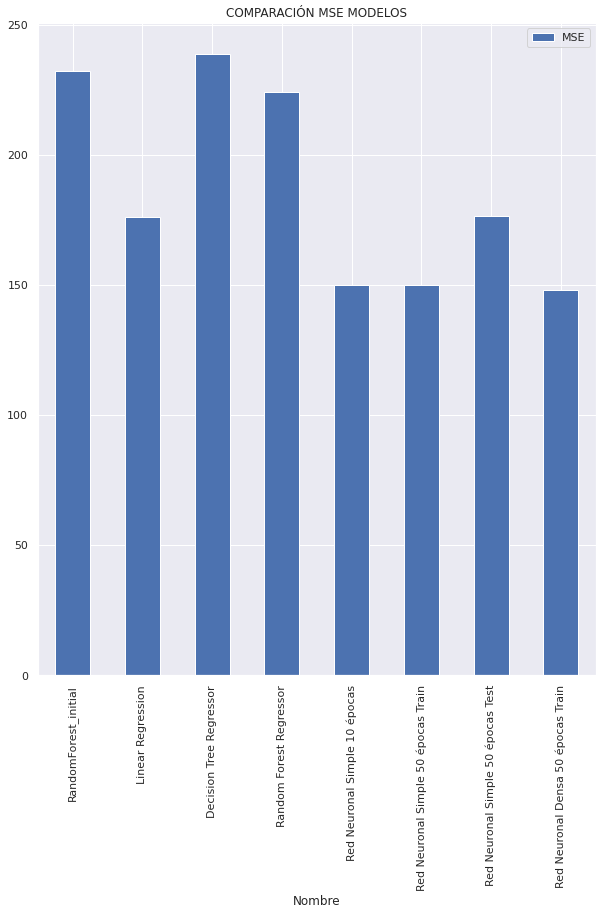

In [150]:
datos_ = {'Nombre': nombre_modelos, 'MSE': mse_modelos}
dfx_ = pd.DataFrame(datos_)
save_fig("COMPARACIÓN_MSE_MODELOS_F")
dfx_.plot(kind='bar', x='Nombre', y='MSE', title= "COMPARACIÓN MSE MODELOS")

In [151]:
for i in range (len(nombre_modelos)):
    print("Modelo ",nombre_modelos[i], " y  su valor de mse: ", mse_modelos[i])

Modelo  RandomForest_initial  y  su valor de mse:  232.18047101160445
Modelo  Linear Regression  y  su valor de mse:  176.01489602687045
Modelo  Decision Tree Regressor  y  su valor de mse:  238.7286487608575
Modelo  Random Forest Regressor  y  su valor de mse:  223.92956023914243
Modelo  Red Neuronal Simple 10 épocas  y  su valor de mse:  150.02391052246094
Modelo  Red Neuronal Simple 50 épocas Train  y  su valor de mse:  149.98777770996094
Modelo  Red Neuronal Simple 50 épocas Test  y  su valor de mse:  176.29908752441406
Modelo  Red Neuronal Densa 50 épocas Train  y  su valor de mse:  148


Se concluye que la utilización de redes neuronales ofrece mejores resultados; ya se trata de hacerle tunning a los diferentes modelos para optimizar los resultados. <br> <br>
__Agradecimientos al Ing. Marco Terán por si dedicación, guía y explicaciones para que desarrolláramos este proyecto__